# CREATE VISUALIZATIONS

In [1]:
import polars as pl
import polars.selectors as cs
from glob import glob
from toolz import pipe
from functools import reduce
import plotnine 

In [2]:
(joined :=pl.read_csv('./data/union_joined.csv').sort('year'))

gender,TUCASEID,TULINENO,TULINENO_right,weight,TUACTIVITY_N,avg_weighted_duration,TUTIER2CODE,TUTIER3CODE,activity_type,year
str,i64,i64,i64,i64,i64,i64,i64,i64,str,i64
"""Female""",20030100013344,1,1,1735322,null,0,null,null,null,2003
"""Male""",20030100013344,2,1,1735322,null,0,null,null,null,2003
"""Female""",20030100013352,1,1,3830527,7,15,1,4,null,2003
"""Female""",20030100013352,1,1,3830527,10,180,2,1,"""Food_Prep_And_Cleanup""",2003
"""Male""",20030100013352,2,1,3830527,14,60,2,3,"""Food_Prep_And_Cleanup""",2003
…,…,…,…,…,…,…,…,…,…,…
"""Female""",20241212242273,1,1,10272309,20,5,9,2,null,2024
"""Female""",20241212242273,1,1,10272309,22,15,2,3,"""Food_Prep_And_Cleanup""",2024
"""Male""",20241212242273,2,1,10272309,16,30,5,1,null,2024


## PROCESS DATA FOR CHART 1

In [3]:
#processing chart 1

(chart_1 :=  joined # to  create chart 1
 .group_by('gender','year')
 .agg(((pl.col('avg_weighted_duration')*pl.col('weight')).sum()/(pl.col('weight').sum())).round(decimals = 1)
      , avg_unweighted_duration = pl.col('avg_weighted_duration').mean()
     )
.sort(by= ['year','gender'])
.unpivot(
    on = ["avg_weighted_duration","avg_unweighted_duration"]
    ,index = ["gender","year"]
    ,value_name = "value"
    ,variable_name = "type"
    )
)

gender,year,type,value
str,i64,str,f64
"""Female""",2003,"""avg_weighted_duration""",30.3
"""Male""",2003,"""avg_weighted_duration""",30.4
"""Female""",2004,"""avg_weighted_duration""",30.7
"""Male""",2004,"""avg_weighted_duration""",29.1
"""Female""",2005,"""avg_weighted_duration""",30.9
…,…,…,…
"""Male""",2022,"""avg_unweighted_duration""",32.998854
"""Female""",2023,"""avg_unweighted_duration""",33.862943
"""Male""",2023,"""avg_unweighted_duration""",32.681908


## PROCESS DATA FOR CHART 2

In [4]:
# I added this pivoting to ensure that all people will now have all activity types  listed before I conduct my calculation in the next cell.
(chart_2_temp := joined
 .drop('TUTIER2CODE','TUTIER3CODE')
 .pivot(on = 'activity_type'
         , index = ["gender","year",'TUCASEID','weight','TUACTIVITY_N','TULINENO']
         , values = "avg_weighted_duration"
         , aggregate_function = "sum"
         )
 .drop('null','TUACTIVITY_N')
 .unpivot(
    on = ['Food_Prep_And_Cleanup',	'Interior_Cleaning','Laundry']
    ,index = ["gender","year",'TUCASEID','weight','TULINENO']
    ,value_name = "avg_weighted_duration"
    ,variable_name = "activity_type"
    ) 
 .unique()
)

gender,year,TUCASEID,weight,TULINENO,activity_type,avg_weighted_duration
str,i64,i64,i64,i64,str,i64
"""Male""",2003,20030504031239,3052183,2,"""Food_Prep_And_Cleanup""",0
"""Female""",2017,20170101170855,3332193,1,"""Food_Prep_And_Cleanup""",30
"""Female""",2007,20070402072381,2673852,2,"""Interior_Cleaning""",120
"""Male""",2018,20181210180885,4940206,2,"""Interior_Cleaning""",0
"""Female""",2003,20031211031002,2810667,1,"""Food_Prep_And_Cleanup""",45
…,…,…,…,…,…,…
"""Female""",2013,20131110130804,6523309,1,"""Food_Prep_And_Cleanup""",0
"""Male""",2019,20190201191210,15601218,1,"""Food_Prep_And_Cleanup""",0
"""Female""",2010,20100202100986,2345219,2,"""Food_Prep_And_Cleanup""",30


In [5]:
# creates the aggregation
(chart_2 := chart_2_temp
.group_by('gender','year','activity_type')
.agg(((pl.col('avg_weighted_duration')*pl.col('weight')).sum()/(pl.col('weight').sum())).round(decimals = 1) #conduct weighted avaerage
      , avg_unweighted_duration = pl.col('avg_weighted_duration').mean())  # calculation  for unweighted average
.filter(#(pl.col('year').is_not_null()) & 
        (pl.col('gender') == "Male") & (pl.col('activity_type').is_in(['Interior_Cleaning','Food_Prep_And_Cleanup','Laundry']))) # conduct  final filters
.unpivot(
    on = ["avg_weighted_duration","avg_unweighted_duration"]
    ,index = ["gender","year","activity_type"]
    ,value_name = "value"
    ,variable_name = "type"
    )
.sort(by= ['year','gender'])    
 )


gender,year,activity_type,type,value
str,i64,str,str,f64
"""Male""",2003,"""Food_Prep_And_Cleanup""","""avg_weighted_duration""",8.4
"""Male""",2003,"""Interior_Cleaning""","""avg_weighted_duration""",5.6
"""Male""",2003,"""Laundry""","""avg_unweighted_duration""",2.573763
"""Male""",2003,"""Interior_Cleaning""","""avg_unweighted_duration""",6.45646
"""Male""",2003,"""Laundry""","""avg_weighted_duration""",2.3
…,…,…,…,…
"""Male""",2024,"""Food_Prep_And_Cleanup""","""avg_weighted_duration""",11.3
"""Male""",2024,"""Laundry""","""avg_unweighted_duration""",2.556313
"""Male""",2024,"""Interior_Cleaning""","""avg_weighted_duration""",6.8


## CREATE CHART 1

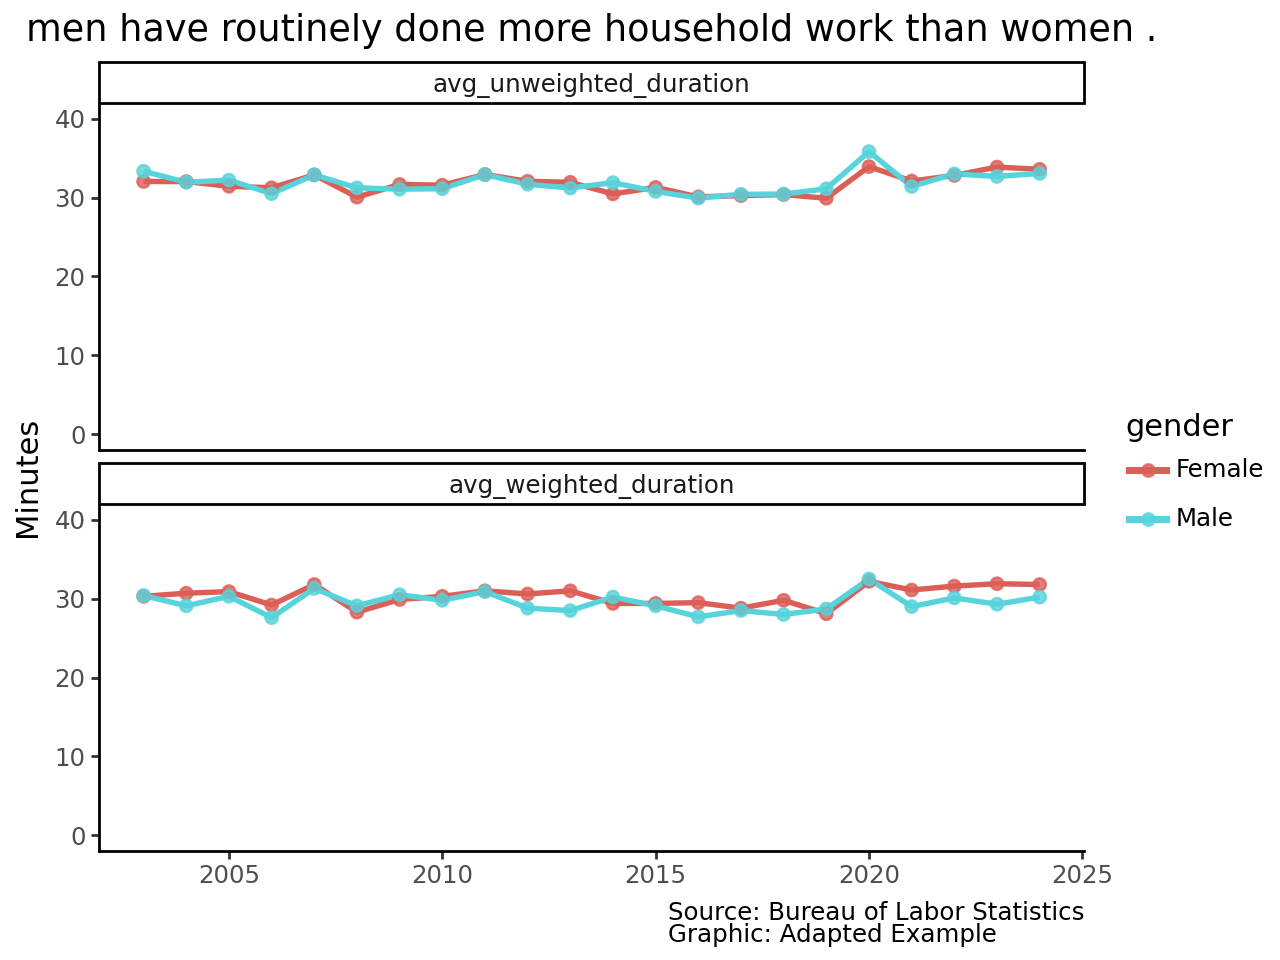

In [6]:
from plotnine import     ggplot,aes,geom_line,geom_point,theme_minimal,labs,theme,scale_y_continuous,element_text,facet_wrap, theme_classic
(chart_1_plot := 
    ggplot(chart_1, aes(x='year', y='value', color='gender', group='gender')) +
    geom_line(size=1.1) +
    geom_point(size=2, alpha=0.8) +
    facet_wrap('~type', ncol=1, scales='fixed') +  
    theme_minimal() +
    labs(
        x='',
        y='Minutes',
        title='men have routinely done more household work than women .',
        caption='Source: Bureau of Labor Statistics\nGraphic: Adapted Example'
    ) +
theme_classic()+
    scale_y_continuous(limits=(0, 40))
)



## CREATE CHART 2

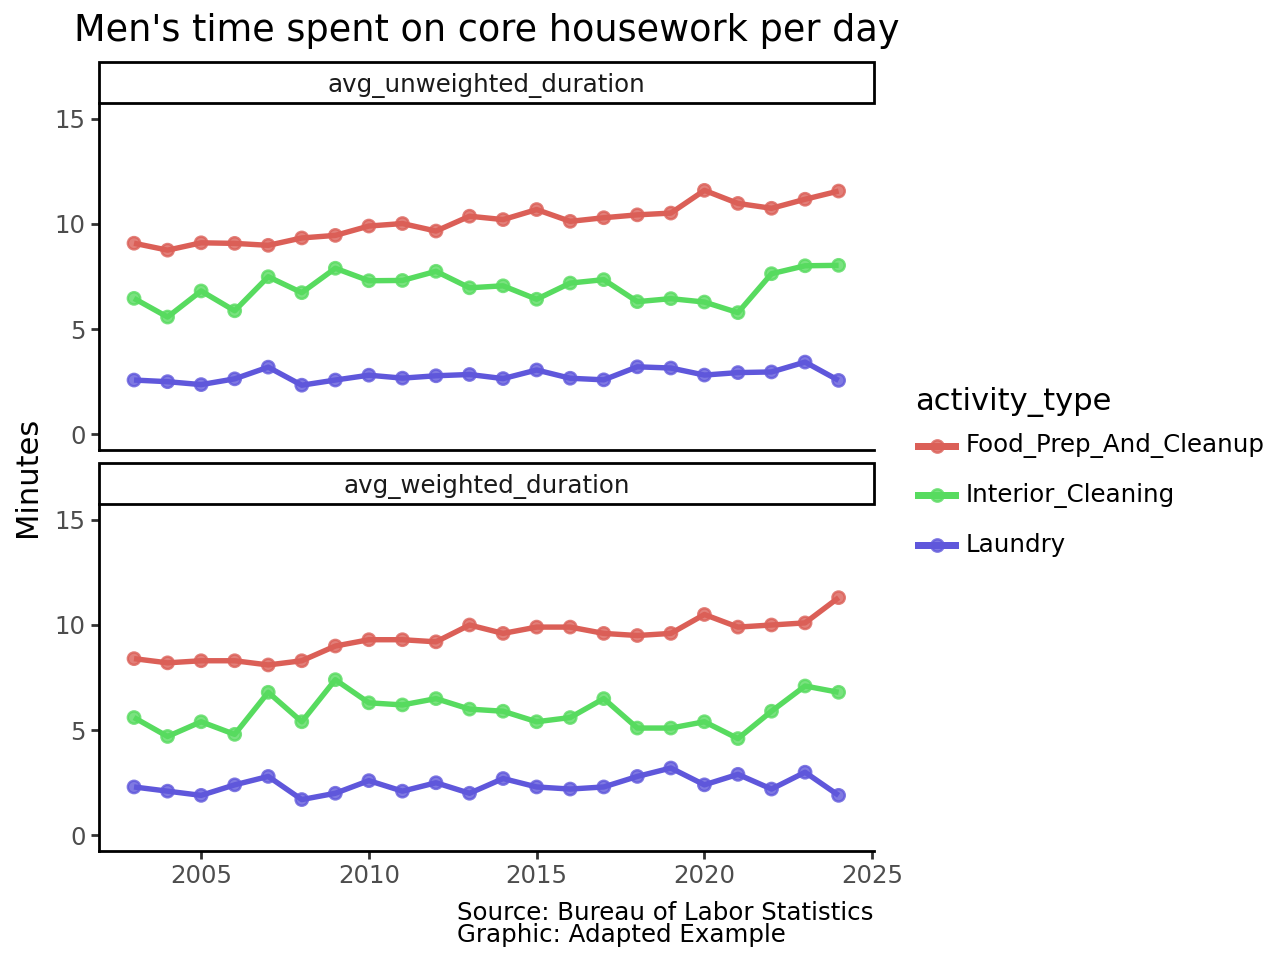

In [7]:
(chart_2_plot := 
    ggplot(chart_2, aes(x='year', y='value', color='activity_type', group='activity_type')) +
    geom_line(size=1.1) +
    geom_point(size=2, alpha=0.8) +
    facet_wrap('~type', ncol=1, scales='fixed') +   
    theme_minimal() +
    labs(
        x='',
        y='Minutes',
        title="Men's time spent on core housework per day",
        caption='Source: Bureau of Labor Statistics\nGraphic: Adapted Example'
    ) +
theme_classic()+
    scale_y_continuous(limits=(0, 15))
)

